In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn import metrics


In [3]:
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv" , index_col=0)

In [4]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,15741032,Tsao,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,15750014,Chikere,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
8,15784761,Ballard,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
9,15768359,Akhtar,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251


In [5]:
df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [7]:
df.shape

(10000, 17)

In [8]:
df.isna().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [9]:
df.duplicated().sum()

0

In [10]:
desc = pd.DataFrame(index = list(df))
desc['type'] = df.dtypes
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] /len(df) * 100
desc['null'] = df.isnull().sum()
desc['%null'] = desc['null'] / len(df) * 100
desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
CustomerId,int64,10000,10000,100.000000,0,0.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,int64,10000,460,4.600000,0,0.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,int64,10000,70,0.700000,0,0.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,int64,10000,11,0.110000,0,0.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,int64,10000,4,0.040000,0,0.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,int64,10000,2,0.020000,0,0.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,int64,10000,2,0.020000,0,0.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
Exited,int64,10000,2,0.020000,0,0.000000,0.203800,0.402842,0.000000,0.000000,0.000000,0.000000,1.000000
Complain,int64,10000,2,0.020000,0,0.000000,0.204400,0.403283,0.000000,0.000000,0.000000,0.000000,1.000000
Satisfaction Score,int64,10000,5,0.050000,0,0.000000,3.013800,1.405919,1.000000,2.000000,3.000000,4.000000,5.000000


In [11]:
# Heat Map for Numerical columns
num_cols  = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
plt.figure(figsize=(15,10))
plot = px.imshow(df[num_cols].corr(), text_auto=True, aspect=.01, color_continuous_scale=px.colors.sequential.Cividis_r )
plot.update_traces(texttemplate='%{z:.2f}', zmin=-1, zmax=1)
plot.update_layout(title_text="Correlation Matrix")
plot.show()

<Figure size 1500x1000 with 0 Axes>

In [12]:
# Show unique Values at categorical columns
for col in cat_cols:
  if col != "Surname":
    print(f"Unique value of {col} : " + str(df[col].unique()))

Unique value of Geography : ['France' 'Spain' 'Germany']
Unique value of Gender : ['Female' 'Male']
Unique value of Card Type : ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [13]:
# Drop unimportant Columns
df.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [14]:
num_cols  = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [15]:
plot = make_subplots(rows=4 , cols=3  , horizontal_spacing=0.1 , vertical_spacing=0.1)
plot.update_layout(title_text=f"Distribution of Numerical cols" , title_x=0.5 , title_y=0.95 , title_font_size=20)
plot.update_layout(
    plot_bgcolor='lightgray',
    paper_bgcolor='lightBlue',  width=1200)
for col in num_cols:
  plot.add_trace(go.Histogram(x=df[col],name=col), row=num_cols.get_loc(col)//3+1, col=num_cols.get_loc(col)%3+1 )
plot.show()



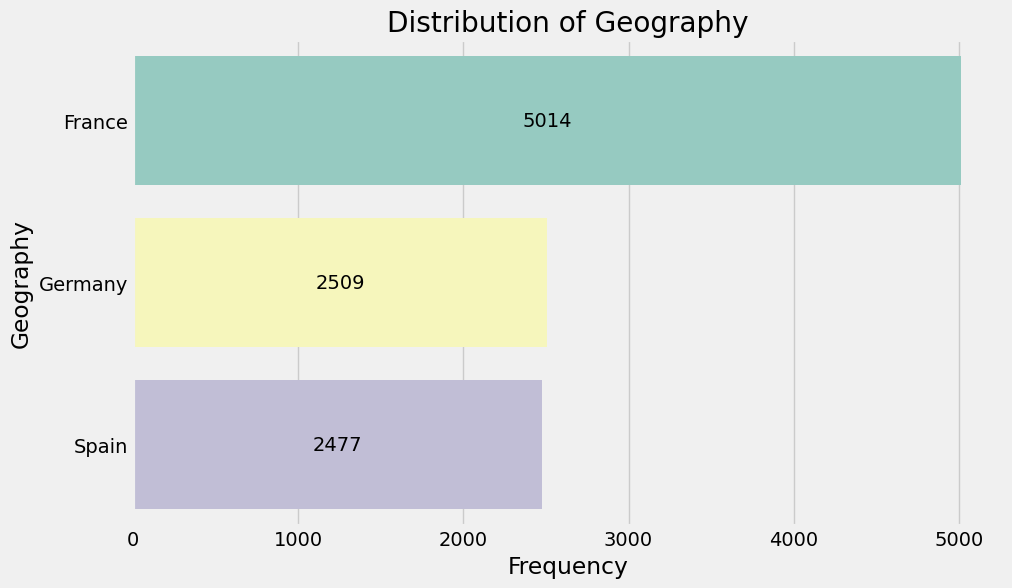

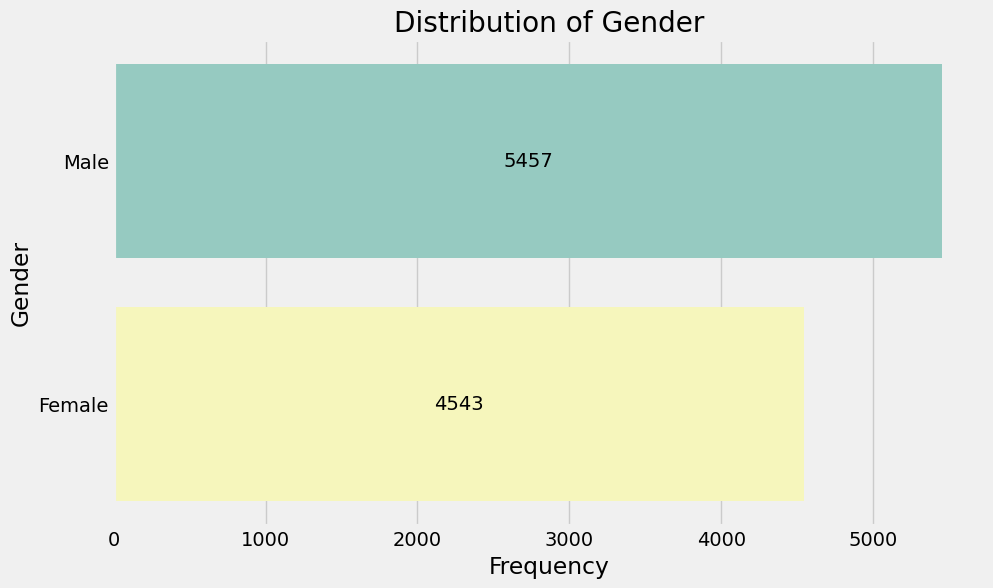

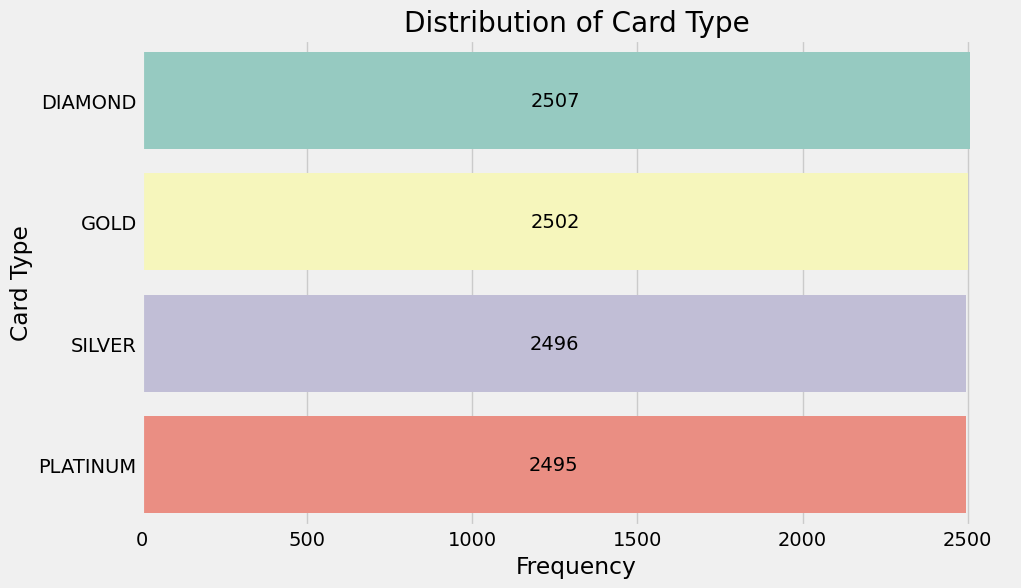

In [16]:
for col in cat_cols :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

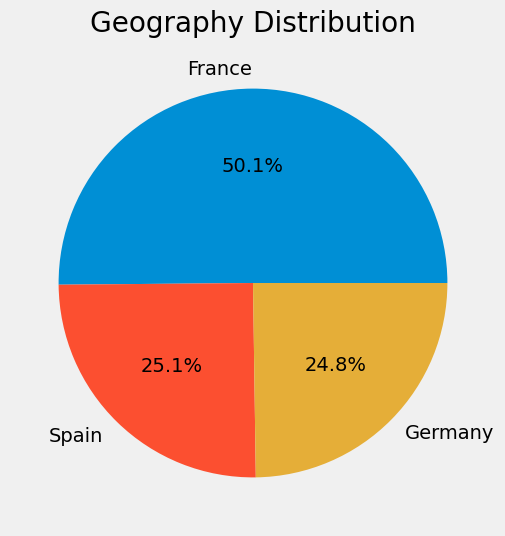

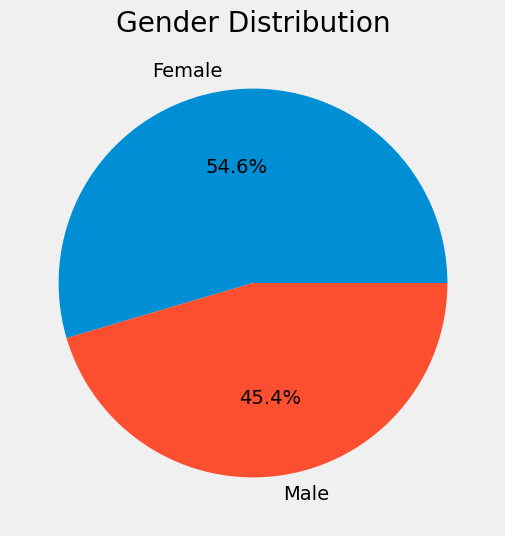

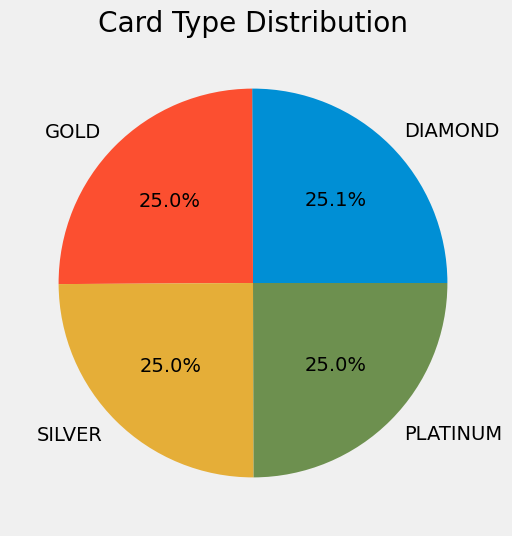

In [17]:
for col in cat_cols:
  plt.figure(figsize=(10, 6))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
  plt.title(f'{col} Distribution')
  plt.show()

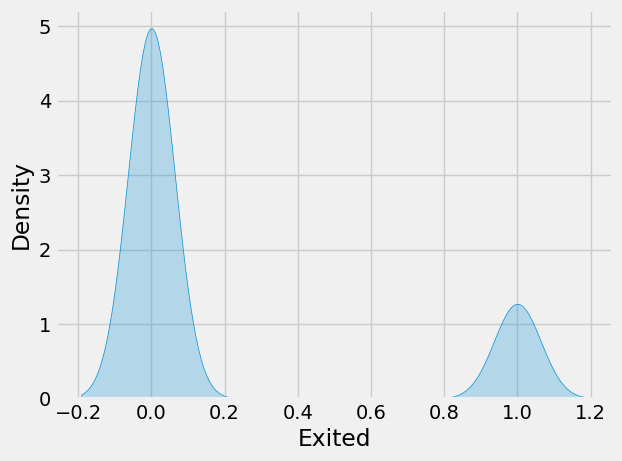

In [18]:
# Target Distribuition
sns.kdeplot(df["Exited"], fill=True);

In [19]:
fig = make_subplots(rows=4 , cols=3  , horizontal_spacing=0.2 , vertical_spacing=0.05)
for i,col in enumerate(num_cols):
  fig.add_trace(go.Box(x=df[col],name=col), row=i//3+1, col=i%3+1)
  fig.update_layout(title_text=f"Box Plot of {col}")
fig.show()


In [20]:
df['CreditScore'] = df['CreditScore'].clip(lower=df['CreditScore'].quantile(0.15), upper=df['CreditScore'].quantile(0.85))
plot = px.box(df['CreditScore'])
plot.show()

In [21]:
df['Age'] = df['Age'].clip(lower=df['Age'].quantile(0.15), upper=df['Age'].quantile(0.85))
plot = px.box(df['Age'])
plot.show()

In [22]:
label_cols = ['Card Type']
onehot_cols = ['Geography', 'Gender']

In [23]:
le = LabelEncoder()
for col in label_cols:
  df[col] = le.fit_transform(df[col] )

In [24]:
df = pd.get_dummies(df, columns=onehot_cols , dtype=int)

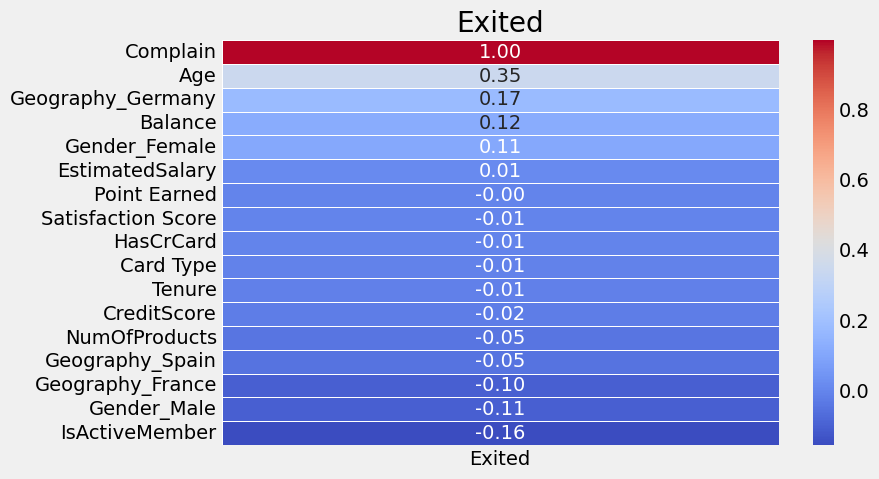

In [25]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['Exited'].sort_values(ascending=False).drop('Exited' )
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Exited')
plt.show()

In [26]:
X= df.drop("Exited", axis=1)
y= df["Exited"]

In [27]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [28]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model_Rand = RandomForestClassifier()
model_Rand.fit(x_train, y_train)


RandomForestClassifier()

In [31]:
y_pred_Rand = model_Rand.predict(x_test)

Model: RandomForestClassifier
Accuracy: 0.998116169544741
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1651
           1       1.00      1.00      1.00      1534

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185

Confusion Matrix:



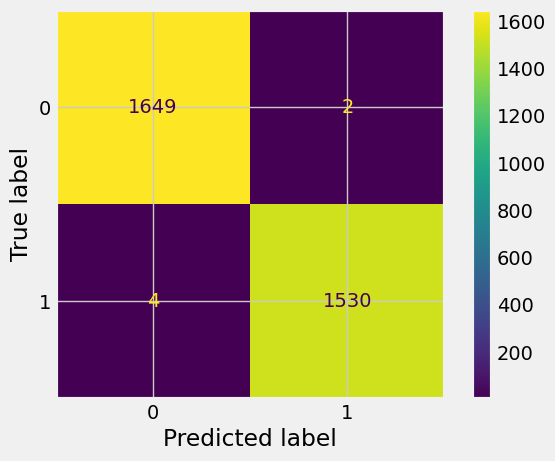

In [32]:
print(f"Model: {model_Rand.__class__.__name__}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_Rand)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_Rand)}")
print(f"Confusion Matrix:\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_Rand), display_labels=[0, 1])
cm_display.plot()
plt.show()


In [33]:
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = pd.Series(anova_selector.scores_, index=X.columns)
selected_features = anova_scores.sort_values(ascending=False).index[:8]
print("\nSelected Features Based on Anova:\n", selected_features)


Selected Features Based on Anova:
 Index(['Complain', 'Age', 'IsActiveMember', 'Gender_Male', 'Geography_France',
       'Geography_Spain', 'NumOfProducts', 'HasCrCard'],
      dtype='object')


In [34]:
X_selected = X[selected_features]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [36]:
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred_log = model_log.predict(x_test)

Model: LogisticRegression
Accuracy: 0.9971742543171115
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1651
           1       1.00      1.00      1.00      1534

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185

Confusion Matrix:



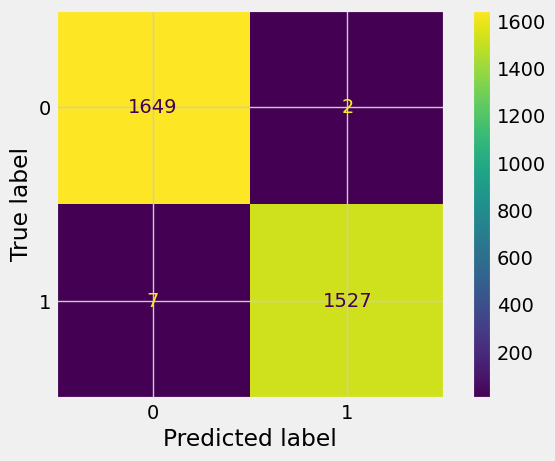

In [38]:
print(f"Model: {model_log.__class__.__name__}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log)}")
print(f"Confusion Matrix:\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_log), display_labels=[0, 1])
cm_display.plot()
plt.show()
